<a href="https://colab.research.google.com/github/DyahAnggunRatnaNingrum/karyawan-fightunited/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **segmentasi daerah di jawa tengah berdasarkan partisipasi dan representasi perempuan untuk menentukan wilayah prioritas dalam perencanaan program kesetaraan gender**

In [ ]:
import pandas as pd

url_ipg = 'https://docs.google.com/spreadsheets/d/1AvhuqUb2g6mHSgurdlCyoGfRomfEFvh5/export?format=csv&gid=39347724'
url_idg = 'https://docs.google.com/spreadsheets/d/1CDKqM3iktZjpiCS0H2lH8RAv7mmTMGig/export?format=csv&gid=946532941'
url_tpak_p = 'https://docs.google.com/spreadsheets/d/17bOtouRHKlr2B9ThNXDNuVWZom6HA4jF/export?format=csv&gid=1559940959'
url_tpak_l = 'https://docs.google.com/spreadsheets/d/1ChpKcueM0QPXvc5iysn8uBPoGx5WWr2o/export?format=csv&gid=199468469'
url_pendapatan = 'https://docs.google.com/spreadsheets/d/1k4pD92AB1RsO2KxiY2EQqHnKr3Pr3Ux2/export?format=csv'
url_legislatif = 'https://docs.google.com/spreadsheets/d/1qk26ABByfOiDd3prDAloSj-Wq_ZjN_S8/export?format=csv'
url_profesional = 'https://docs.google.com/spreadsheets/d/1rsiWo6GjYkN-y7L7YCat5Hmyq8j-qQiv/export?format=csv'

# Load dan bersihkan
df_ipg = pd.read_csv(url_ipg).drop(columns=['Unnamed: 0'], errors='ignore')
df_idg = pd.read_csv(url_idg).drop(columns=['Unnamed: 0'], errors='ignore')
df_tpak_p = pd.read_csv(url_tpak_p).drop(columns=['Unnamed: 0'], errors='ignore')
df_tpak_l = pd.read_csv(url_tpak_l).drop(columns=['Unnamed: 0'], errors='ignore')
df_pendapatan = pd.read_csv(url_pendapatan).drop(columns=['Unnamed: 0'], errors='ignore')
df_legislatif = pd.read_csv(url_legislatif).drop(columns=['Unnamed: 0'], errors='ignore')
df_profesional = pd.read_csv(url_profesional).drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
# Cek nama-nama kolom di setiap DataFrame
print(df_ipg.columns)
print(df_idg.columns)
print(df_tpak_p.columns)
print(df_tpak_l.columns)
print(df_pendapatan.columns)
print(df_legislatif.columns)
print(df_profesional.columns)

Index(['Kabupaten / Kota', 'Tahun', 'IPG'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'IDG'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'TPAK Perempuan'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'TPAK Laki-laki'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'Pendapatan Perempuan'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'Perempuan di Legislatif'], dtype='object')
Index(['Kabupaten / Kota', 'Tahun', 'Perempuan Tenaga Profesional'], dtype='object')


In [ ]:
# Tahun yang ingin diambil
tahun_dipilih = ['2019', '2020', '2021', '2022', '2023']

# Fungsi untuk memfilter berdasarkan isi kolom 'Tahun'
def filter_tahun(df, tahun_dipilih):
    return df[df['Tahun'].astype(str).isin(tahun_dipilih)]

# Terapkan ke semua DataFrame
df_ipg = filter_tahun(df_ipg, tahun_dipilih)
df_idg = filter_tahun(df_idg, tahun_dipilih)
df_tpak_p = filter_tahun(df_tpak_p, tahun_dipilih)
df_tpak_l = filter_tahun(df_tpak_l, tahun_dipilih)
df_pendapatan = filter_tahun(df_pendapatan, tahun_dipilih)
df_legislatif = filter_tahun(df_legislatif, tahun_dipilih)
df_profesional = filter_tahun(df_profesional, tahun_dipilih)

In [ ]:
# Gabungkan semua DataFrame berdasarkan 'Kabupaten / Kota' dan 'Tahun'
df_merged = df_ipg.merge(df_idg, on=['Kabupaten / Kota', 'Tahun'], how='outer') \
    .merge(df_tpak_p, on=['Kabupaten / Kota', 'Tahun'], how='outer') \
    .merge(df_tpak_l, on=['Kabupaten / Kota', 'Tahun'], how='outer') \
    .merge(df_pendapatan, on=['Kabupaten / Kota', 'Tahun'], how='outer') \
    .merge(df_legislatif, on=['Kabupaten / Kota', 'Tahun'], how='outer') \
    .merge(df_profesional, on=['Kabupaten / Kota', 'Tahun'], how='outer')

df_merged.head(20)

,Kabupaten / Kota,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional
0,3300 PROVINSI JAWA TENGAH,2019,91.89,34.31,NaN,NaN,34.31,NaN,49.36
1,3300 PROVINSI JAWA TENGAH,2020,92.18,34.29,NaN,NaN,34.29,NaN,50.20
2,3300 PROVINSI JAWA TENGAH,2021,92.48,34.60,NaN,NaN,34.60,NaN,50.67
3,3300 PROVINSI JAWA TENGAH,2022,92.83,34.59,NaN,NaN,34.59,NaN,50.72
4,3300 PROVINSI JAWA TENGAH,2023,92.87,35.21,NaN,NaN,35.21,NaN,51.00
5,3300 Provinsi Jawa Tengah,2019,NaN,NaN,55.35,82.78,NaN,NaN,NaN
6,3300 Provinsi Jawa Tengah,2020,NaN,NaN,57.54,81.68,NaN,NaN,NaN
7,3300 Provinsi Jawa Tengah,2021,NaN,NaN,57.58,81.94,NaN,NaN,NaN
8,3300 Provinsi Jawa Tengah,2022,NaN,NaN,58.31,83.74,NaN,NaN,NaN
9,3300 Provinsi Jawa Tengah,2023,NaN,NaN,58.92,84.52,NaN,NaN,NaN


In [ ]:
# Hapus baris yang memiliki 'JAWA TENGAH' atau 'jAWA tENGAH' di kolom 'Kabupaten / Kota'
df_clean = df_merged[~df_merged['Kabupaten / Kota'].str.contains('JAWA TENGAH', case=False)]

df_clean.head()

,Kabupaten / Kota,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional
10,3301 Kabupaten Cilacap,2019,86.67,26.35,47.10,83.69,26.35,24.0,45.11
11,3301 Kabupaten Cilacap,2020,86.69,26.44,52.45,83.21,26.44,26.0,43.97
12,3301 Kabupaten Cilacap,2021,87,26.83,46.99,78.90,26.83,26.0,45.69
13,3301 Kabupaten Cilacap,2022,87.02,26.48,49.83,81.54,26.48,26.0,55.57
14,3301 Kabupaten Cilacap,2023,87.34,26.42,48.11,85.00,26.42,16.0,40.97


In [ ]:
df_clean.isnull().sum()

,0
Kabupaten / Kota,0
Tahun,0
IPG,0
IDG,0
TPAK Perempuan,0
TPAK Laki-laki,0
Pendapatan Perempuan,0
Perempuan di Legislatif,0
Perempuan Tenaga Profesional,0


# **DATASET SETELAH DIGABUNNG**

In [ ]:
df_clean.to_excel('dataclean.xlsx')

In [ ]:
df_cluster = pd.read_csv('https://docs.google.com/spreadsheets/d/12RZ2FkFCEB2nln_06LuhjTMRuaFcAOhZ/export?format=csv')

df_cluster = df_cluster.drop(columns=['Unnamed: 0'])
df_cluster.head(10)

,Kabupaten / Kota,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional
0,3301 Kabupaten Cilacap,2019,86.67,26.35,47.10,83.69,26.35,24.0,45.11
1,3301 Kabupaten Cilacap,2020,86.69,26.44,52.45,83.21,26.44,26.0,43.97
2,3301 Kabupaten Cilacap,2021,87.00,26.83,46.99,78.90,26.83,26.0,45.69
3,3301 Kabupaten Cilacap,2022,87.02,26.48,49.83,81.54,26.48,26.0,55.57
4,3301 Kabupaten Cilacap,2023,87.34,26.42,48.11,85.00,26.42,16.0,40.97
5,3302 Kabupaten Banyumas,2019,88.20,30.84,51.27,83.64,30.84,22.0,49.40
6,3302 Kabupaten Banyumas,2020,88.27,30.87,51.74,81.78,30.87,22.0,49.87
7,3302 Kabupaten Banyumas,2021,88.54,30.67,49.95,80.37,30.67,20.0,49.32
8,3302 Kabupaten Banyumas,2022,89.15,31.40,47.91,81.78,31.40,22.0,49.49
9,3302 Kabupaten Banyumas,2023,89.14,31.70,46.08,83.10,31.70,18.0,51.06


# **PREPOCESSING**

# **Cleaning**

In [ ]:
#cek missing value
df_cluster.isnull().sum()

,0
Kabupaten / Kota,0
Tahun,0
IPG,0
IDG,0
TPAK Perempuan,0
TPAK Laki-laki,0
Pendapatan Perempuan,0
Perempuan di Legislatif,0
Perempuan Tenaga Profesional,0


In [ ]:
#cek kondisi data
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kabupaten / Kota              175 non-null    object 
 1   Tahun                         175 non-null    int64  
 2   IPG                           175 non-null    float64
 3   IDG                           175 non-null    float64
 4   TPAK Perempuan                175 non-null    float64
 5   TPAK Laki-laki                175 non-null    float64
 6   Pendapatan Perempuan          175 non-null    float64
 7   Perempuan di Legislatif       175 non-null    float64
 8   Perempuan Tenaga Profesional  175 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
# Cek tipe data kolom
print(df_cluster.dtypes)

Kabupaten / Kota                 object
Tahun                             int64
IPG                             float64
IDG                             float64
TPAK Perempuan                  float64
TPAK Laki-laki                  float64
Pendapatan Perempuan            float64
Perempuan di Legislatif         float64
Perempuan Tenaga Profesional    float64
dtype: object


In [ ]:
df_cluster.describe()

,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2021.000000,92.367543,34.036971,58.280457,82.699543,34.036971,18.773429,50.524343
std,1.418272,3.526309,6.292504,5.305784,3.628968,6.292504,6.955585,4.188568
min,2019.000000,83.880000,23.660000,46.080000,59.630000,23.660000,2.220000,39.920000
25%,2020.000000,91.030000,28.545000,54.705000,80.780000,28.545000,13.330000,47.565000
50%,2021.000000,92.850000,34.750000,58.100000,83.100000,34.750000,18.000000,49.890000
75%,2022.000000,95.355000,38.935000,62.140000,85.130000,38.935000,24.000000,53.160000
max,2023.000000,97.370000,47.360000,74.800000,90.210000,47.360000,36.670000,60.720000


In [ ]:
# Mengecek apakah ada duplikat
duplicate_rows = df_cluster[df_cluster.duplicated()]

# Menampilkan duplikat jika ada
print("Duplikat Baris:")
print(duplicate_rows)

Duplikat Baris:
Empty DataFrame
Columns: [Kabupaten / Kota, Tahun, IPG, IDG, TPAK Perempuan, TPAK Laki-laki, Pendapatan Perempuan, Perempuan di Legislatif, Perempuan Tenaga Profesional]
Index: []


# **Feature Engginering**

In [ ]:
# Membuat fitur Rasio TPAK
df_cluster['Rasio_TPAK'] = df_cluster['TPAK Perempuan'] / df_cluster['TPAK Laki-laki']

In [ ]:
df_cluster.head()

,Kabupaten / Kota,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK
0,3301 Kabupaten Cilacap,2019,86.67,26.35,47.10,83.69,26.35,24.0,45.11,0.562791
1,3301 Kabupaten Cilacap,2020,86.69,26.44,52.45,83.21,26.44,26.0,43.97,0.630333
2,3301 Kabupaten Cilacap,2021,87.00,26.83,46.99,78.90,26.83,26.0,45.69,0.595564
3,3301 Kabupaten Cilacap,2022,87.02,26.48,49.83,81.54,26.48,26.0,55.57,0.611111
4,3301 Kabupaten Cilacap,2023,87.34,26.42,48.11,85.00,26.42,16.0,40.97,0.566000


ITEPRETASI:


1. Mengukur seberapa besar perempuan berpartisipasi dalam angkatan kerja dibanding laki-laki.

2. Semakin mendekati 1, berarti perempuan dan laki-laki partisipasinya seimbang.

3. Jika < 1, berarti perempuan masih lebih sedikit yang aktif di dunia kerja dibanding laki-laki.



In [ ]:
#Skor ini berdasarkan 3 indikator: Rasio_TPAK, Perempuan di Legislatif, dan Perempuan Tenaga Profesional
df_cluster['Skor_Kesetaraan_Gender'] = (
    df_cluster['Rasio_TPAK'] +
    (df_cluster['Perempuan di Legislatif'] / 100) +
    (df_cluster['Perempuan Tenaga Profesional'] / 100)
) / 3

In [ ]:
df_cluster.head()

,Kabupaten / Kota,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender
0,3301 Kabupaten Cilacap,2019,86.67,26.35,47.10,83.69,26.35,24.0,45.11,0.562791,0.417964
1,3301 Kabupaten Cilacap,2020,86.69,26.44,52.45,83.21,26.44,26.0,43.97,0.630333,0.443344
2,3301 Kabupaten Cilacap,2021,87.00,26.83,46.99,78.90,26.83,26.0,45.69,0.595564,0.437488
3,3301 Kabupaten Cilacap,2022,87.02,26.48,49.83,81.54,26.48,26.0,55.57,0.611111,0.475604
4,3301 Kabupaten Cilacap,2023,87.34,26.42,48.11,85.00,26.42,16.0,40.97,0.566000,0.378567


ITEPRETASI:
1. Semakin tinggi (mendekati 1) → semakin tinggi kesetaraan gender di wilayah tersebut.

2. Semakin rendah (mendekati 0) → makin rendah representasi dan partisipasi perempuan.

# **OUTLIERS**

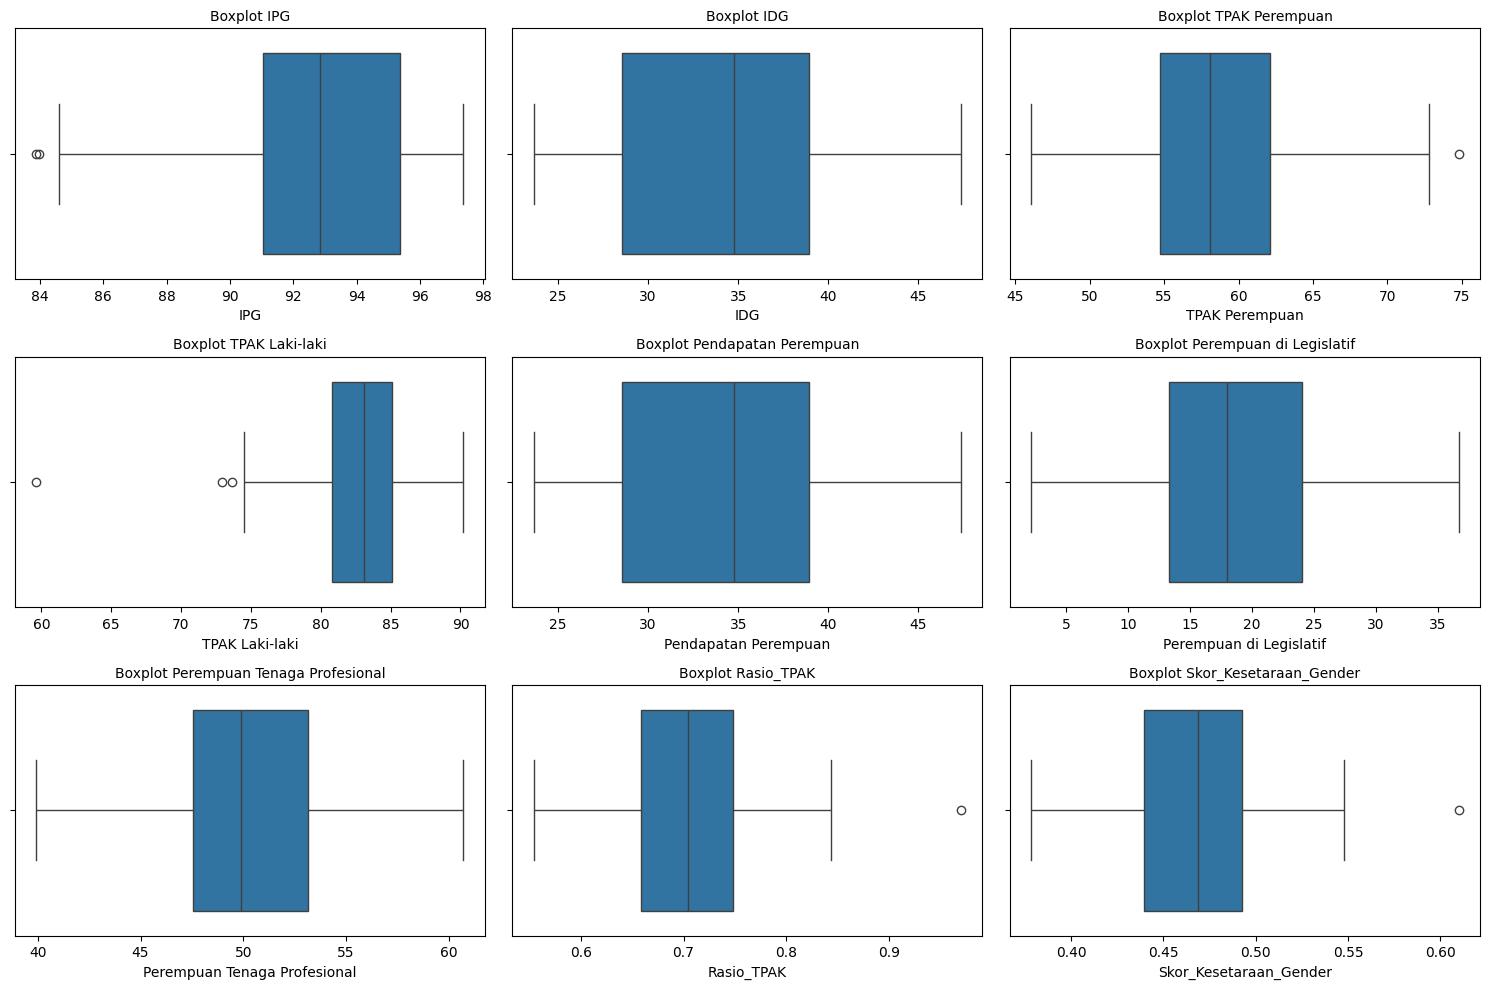

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih hanya kolom numerik (skip Kabupaten/Kota dan Tahun)
numerical_cols = [
    'IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki',
    'Pendapatan Perempuan', 'Perempuan di Legislatif',
    'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender'
]

# Cek outlier dengan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_cluster[col])
    plt.title(f'Boxplot {col}', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df_cluster[numerical_cols].quantile(0.25)
Q3 = df_cluster[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Cek berapa data outlier di setiap kolom
outliers = ((df_cluster[numerical_cols] < (Q1 - 1.5 * IQR)) |
            (df_cluster[numerical_cols] > (Q3 + 1.5 * IQR)))

print(outliers.sum())

IPG                             2
IDG                             0
TPAK Perempuan                  1
TPAK Laki-laki                  3
Pendapatan Perempuan            0
Perempuan di Legislatif         0
Perempuan Tenaga Profesional    0
Rasio_TPAK                      1
Skor_Kesetaraan_Gender          1
dtype: int64


In [ ]:
for col in ['IPG', 'TPAK Perempuan', 'TPAK Laki-laki', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender']:
    Q1 = df_cluster[col].quantile(0.25)
    Q3 = df_cluster[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cluster[(df_cluster[col] < lower_bound) | (df_cluster[col] > upper_bound)]

    print(f"Outlier di kolom {col}:")
    print(outliers[['Kabupaten / Kota', 'Tahun', col]])
    print("-" * 50)

Outlier di kolom IPG:
        Kabupaten / Kota  Tahun    IPG
75  3316 Kabupaten Blora   2019  83.96
76  3316 Kabupaten Blora   2020  83.88
--------------------------------------------------
Outlier di kolom TPAK Perempuan:
           Kabupaten / Kota  Tahun  TPAK Perempuan
59  3312 Kabupaten Wonogiri   2023            74.8
--------------------------------------------------
Outlier di kolom TPAK Laki-laki:
              Kabupaten / Kota  Tahun  TPAK Laki-laki
111  3323 Kabupaten Temanggung   2020           59.63
145         3371 Kota Magelang   2019           72.93
166       3375 Kota Pekalongan   2020           73.67
--------------------------------------------------
Outlier di kolom Rasio_TPAK:
              Kabupaten / Kota  Tahun  Rasio_TPAK
111  3323 Kabupaten Temanggung   2020    0.969646
--------------------------------------------------
Outlier di kolom Skor_Kesetaraan_Gender:
              Kabupaten / Kota  Tahun  Skor_Kesetaraan_Gender
111  3323 Kabupaten Temanggung   2020    

**ITEPRETASI:**

**1. Kabupaten Blora – Outlier pada IPG (2019 & 2020)**

Meskipun nilai IPG Kabupaten Blora pada tahun 2019 (83,96) dan 2020 (83,88) terdeteksi sebagai outlier dalam datasetmu, sebenarnya nilai-nilai tersebut merupakan yang terendah di Jawa Tengah selama empat tahun berturut-turut (2017–2020). Hal ini menunjukkan bahwa Blora memiliki ketimpangan gender yang tinggi, bukan karena data yang ekstrem tinggi, melainkan karena rendahnya IPG dibandingkan daerah lain. ​

https://www.bloranews.com/miris-indeks-pembangunan-gender-kabupaten-blora-terendah-se-jateng-empat-tahun-beruntun

📌 Kesimpulan: Outlier ini mencerminkan realitas sosial yang penting dan perlu dipertahankan dalam analisis.​


**2. Kabupaten Wonogiri – Outlier pada TPAK Perempuan (2023)**

TPAK di Kabupaten Wonogiri meningkat signifikan pada Agustus 2023, mencapai 82,45%, naik dari 74,81% pada Agustus 2022. Peningkatan ini mencerminkan peningkatan partisipasi angkatan kerja, termasuk perempuan. ​
appeda.salatiga.go.id/rpjpd2045/assets/files/Rancangan%20Akhir%20RPJPD%202045%20Salatiga.pdf?

📌 Kesimpulan: Outlier ini mencerminkan tren positif dalam partisipasi kerja perempuan dan perlu dipertahankan dalam analisis.​


**3. Kabupaten Temanggung – Outlier pada TPAK Laki-laki, Rasio_TPAK, dan Skor_Kesetaraan_Gender (2020)**

Pada tahun 2020, TPAK di Kabupaten Temanggung tercatat sebesar 58,73%, yang merupakan penurunan dari tahun sebelumnya. Meskipun data spesifik TPAK laki-laki tidak tersedia, penurunan ini dapat mempengaruhi Rasio_TPAK dan Skor_Kesetaraan_Gender.​

https://temanggungkab.bps.go.id/id/statistics-table/1/MTgyMiMx/tpak-kabupaten-temanggung-menurut-jenis-kelamin-tahun-2019--2024.html

📌 Kesimpulan: Outlier ini mencerminkan fluktuasi dalam partisipasi angkatan kerja dan perlu dipertahankan untuk analisis yang akurat.

**Outlier tidak perlu dihandling, karena memang datanya seperi itu bukan outier yg diakibatkan ketika mengolah data**

#**FEATURE SELECTION**

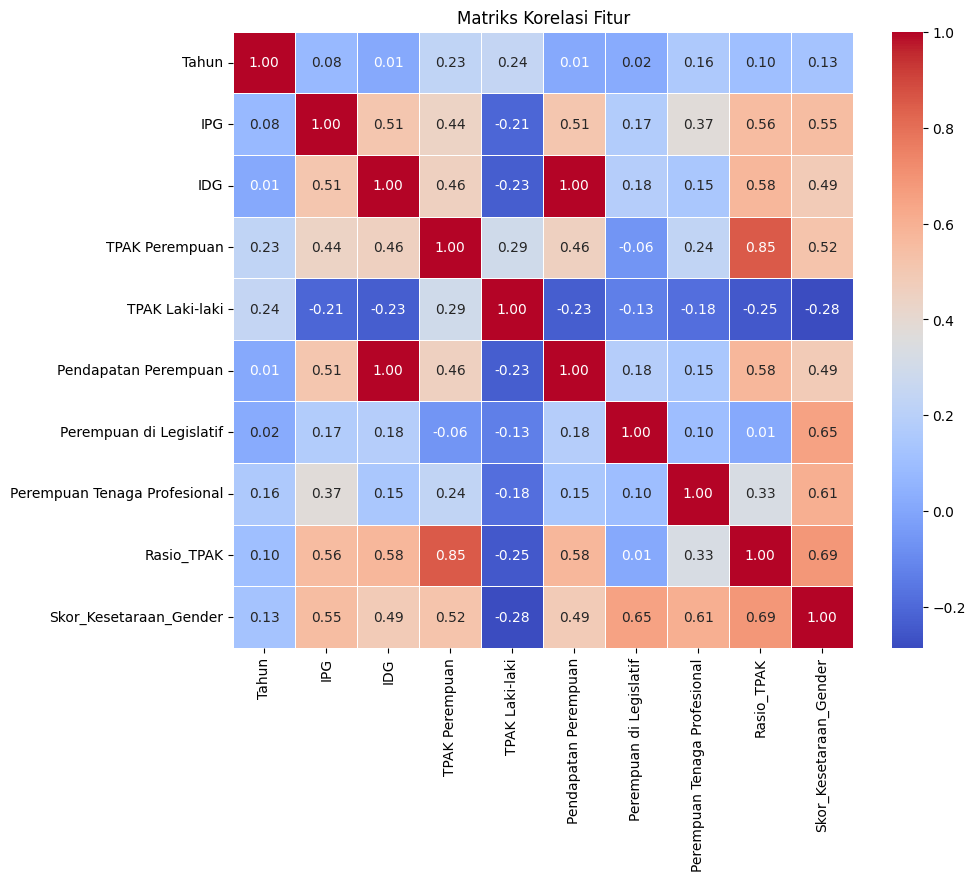

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df adalah dataframe yang kamu punya
# Pilih kolom numerik saja
df_numeric = df_cluster.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi hanya untuk kolom numerik
correlation_matrix = df_numeric.corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

In [ ]:
# Pilih hanya fitur numerik untuk korelasi
df_numeric = df_cluster.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi hanya untuk fitur numerik
correlation_matrix = df_numeric.corr()

# Menampilkan hasil korelasi
print("Korelasi antara fitur-fitur:")
correlation_matrix

Korelasi antara fitur-fitur:


,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender
Tahun,1.000000,0.077038,0.013259,0.231610,0.244229,0.013259,0.017687,0.158603,0.103921,0.126668
IPG,0.077038,1.000000,0.510290,0.442412,-0.206017,0.510290,0.174409,0.374886,0.555612,0.552825
IDG,0.013259,0.510290,1.000000,0.455230,-0.232739,1.000000,0.184005,0.145244,0.577172,0.486772
TPAK Perempuan,0.231610,0.442412,0.455230,1.000000,0.294001,0.455230,-0.063512,0.236816,0.851044,0.522872
TPAK Laki-laki,0.244229,-0.206017,-0.232739,0.294001,1.000000,-0.232739,-0.133988,-0.180575,-0.246435,-0.284783
Pendapatan Perempuan,0.013259,0.510290,1.000000,0.455230,-0.232739,1.000000,0.184005,0.145244,0.577172,0.486772
Perempuan di Legislatif,0.017687,0.174409,0.184005,-0.063512,-0.133988,0.184005,1.000000,0.098386,0.014168,0.650593
Perempuan Tenaga Profesional,0.158603,0.374886,0.145244,0.236816,-0.180575,0.145244,0.098386,1.000000,0.328122,0.608158
Rasio_TPAK,0.103921,0.555612,0.577172,0.851044,-0.246435,0.577172,0.014168,0.328122,1.000000,0.686482
Skor_Kesetaraan_Gender,0.126668,0.552825,0.486772,0.522872,-0.284783,0.486772,0.650593,0.608158,0.686482,1.000000


# **STANDARISASI**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Misalkan df adalah dataframe yang sudah ada
# Pilih hanya fitur numerik untuk distandarisasi
features = df_cluster.select_dtypes(include=['float64', 'int64'])

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standarisasi pada data numerik
df_scaled = scaler.fit_transform(features)

# Ubah hasil standarisasi menjadi DataFrame lagi dengan kolom yang sama
df_scaled = pd.DataFrame(df_scaled, columns=features.columns)

# Gabungkan hasil standarisasi dengan kolom kategorikal yang tetap (seperti Kabupaten dan Tahun)
df_final = pd.concat([df_scaled, df_cluster[['Kabupaten / Kota', 'Tahun']]], axis=1)

# Tampilkan beberapa baris data yang sudah distandarisasi
df_final.head()

,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender,Kabupaten / Kota,Tahun
0,-1.414214,-1.620361,-1.225113,-2.113267,0.273714,-1.225113,0.753577,-1.296357,-2.235967,-1.264094,3301 Kabupaten Cilacap,2019
1,-0.707107,-1.614673,-1.210769,-1.102040,0.141065,-1.210769,1.041941,-1.569307,-1.177077,-0.598001,3301 Kabupaten Cilacap,2020
2,0.000000,-1.526510,-1.148613,-2.134059,-1.050008,-1.148613,1.041941,-1.157487,-1.722169,-0.751695,3301 Kabupaten Cilacap,2021
3,0.707107,-1.520822,-1.204394,-1.597258,-0.320441,-1.204394,1.041941,1.208082,-1.478428,0.248624,3301 Kabupaten Cilacap,2022
4,1.414214,-1.429815,-1.213957,-1.922362,0.635734,-1.213957,-0.399878,-2.287598,-2.185662,-2.298042,3301 Kabupaten Cilacap,2023


**ITEPRETASI:**


1. Semua nilai sudah "digeser" ke rata-rata 0 dan punya penyebaran standar deviasi 1.

2. Nilai negatif artinya di bawah rata-rata semua kabupaten/kota di dataset kamu, sedangkan nilai positif berarti di atas rata-rata.

**Misal:**

1. IPG -1.62 → artinya IPG di kabupaten itu jauh lebih rendah dari rata-rata semua kabupaten di dataset kamu.

2. TPAK Perempuan -2.11 → artinya partisipasi perempuan di angkatan kerja di kabupaten itu sangat rendah dibanding daerah lain.

3. Perempuan di Legislatif 0.75 → ini lebih tinggi dari rata-rata, meskipun IPG dan TPAK rendah.

# **Exploratory Data Analysis**

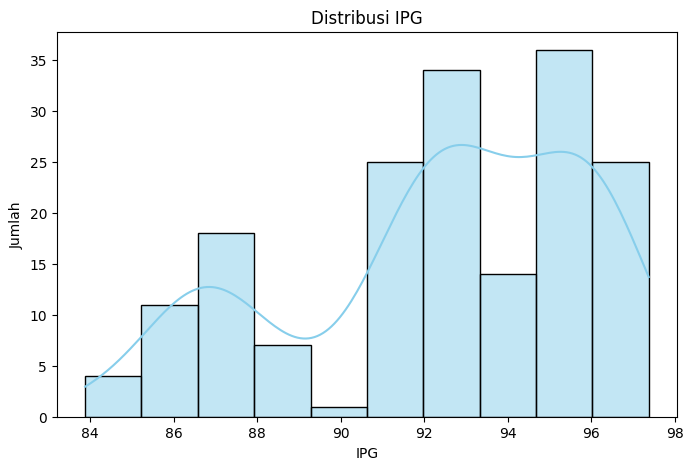

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['IPG'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi IPG')
plt.xlabel('IPG')
plt.ylabel('Jumlah')
plt.show()

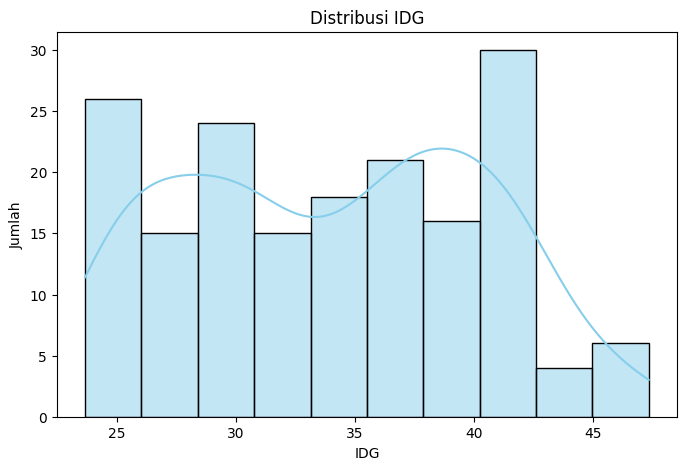

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['IDG'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi IDG')
plt.xlabel('IDG')
plt.ylabel('Jumlah')
plt.show()

Histogram IDG menunjukkan distribusi bimodal dan sedikit condong ke kanan, dengan mayoritas data terkumpul di sekitar angka 30 dan 40.

**Key Takeaways**

Ini mengindikasikan adanya dua kelompok berbeda dalam data, membuka peluang segmentasi, serta menunjukkan outlier di nilai tinggi yang bisa memengaruhi hasil analisis.

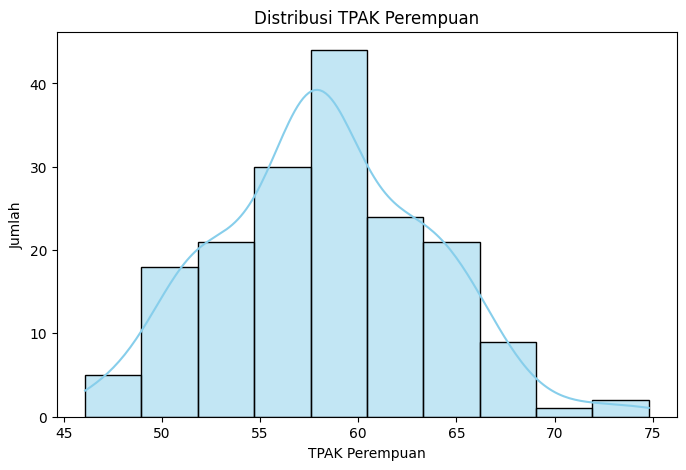

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['TPAK Perempuan'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi TPAK Perempuan')
plt.xlabel('TPAK Perempuan')
plt.ylabel('Jumlah')
plt.show()

Grafik menunjukkan bahwa sebagian besar wilayah memiliki TPAK perempuan berkisar antara 55% hingga 65%, dengan puncak distribusi di sekitar 60%. Pola distribusi ini menyerupai distribusi normal, menandakan bahwa mayoritas wilayah berada di kisaran tengah, sementara hanya sedikit wilayah dengan TPAK perempuan yang sangat rendah (<50%) atau sangat tinggi (>70%).

Kesimpulan: Sebagian besar wilayah menunjukkan tingkat partisipasi angkatan kerja perempuan yang cukup moderat, namun masih terdapat variasi yang mencerminkan adanya ketimpangan partisipasi kerja perempuan antarwilayah.

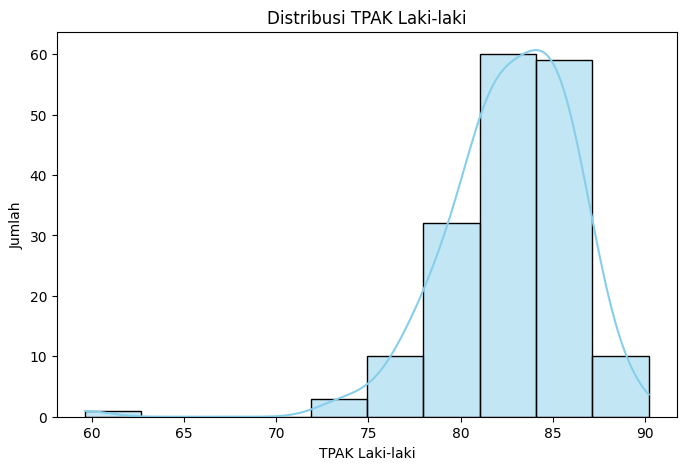

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['TPAK Laki-laki'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi TPAK Laki-laki')
plt.xlabel('TPAK Laki-laki')
plt.ylabel('Jumlah')
plt.show()

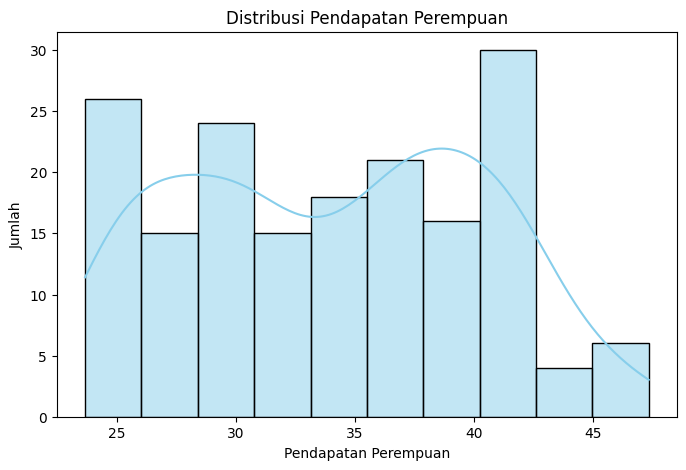

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['Pendapatan Perempuan'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Pendapatan Perempuan')
plt.xlabel('Pendapatan Perempuan')
plt.ylabel('Jumlah')
plt.show()

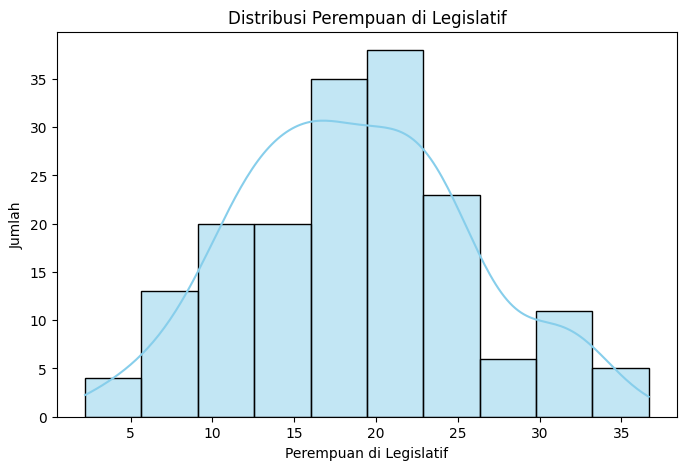

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['Perempuan di Legislatif'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Perempuan di Legislatif')
plt.xlabel('Perempuan di Legislatif')
plt.ylabel('Jumlah')
plt.show()

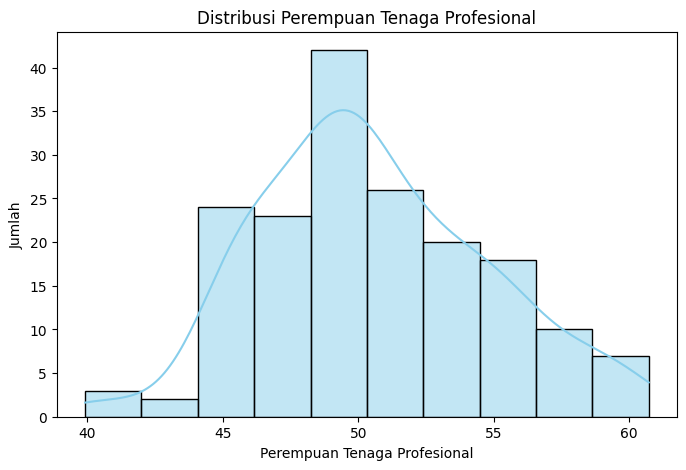

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['Perempuan Tenaga Profesional'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Perempuan Tenaga Profesional')
plt.xlabel('Perempuan Tenaga Profesional')
plt.ylabel('Jumlah')
plt.show()

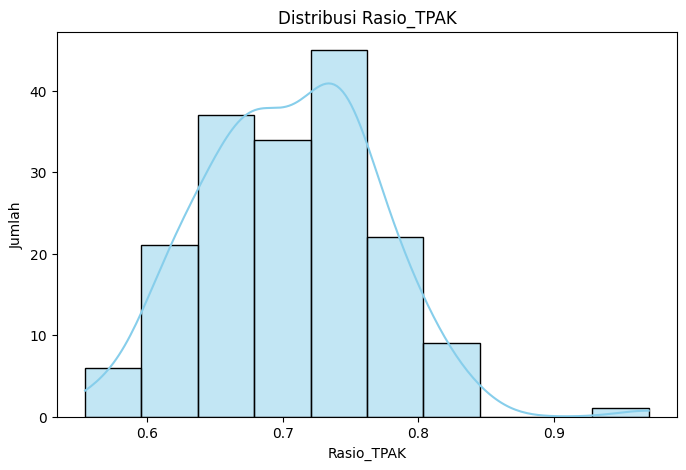

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['Rasio_TPAK'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Rasio_TPAK')
plt.xlabel('Rasio_TPAK')
plt.ylabel('Jumlah')
plt.show()

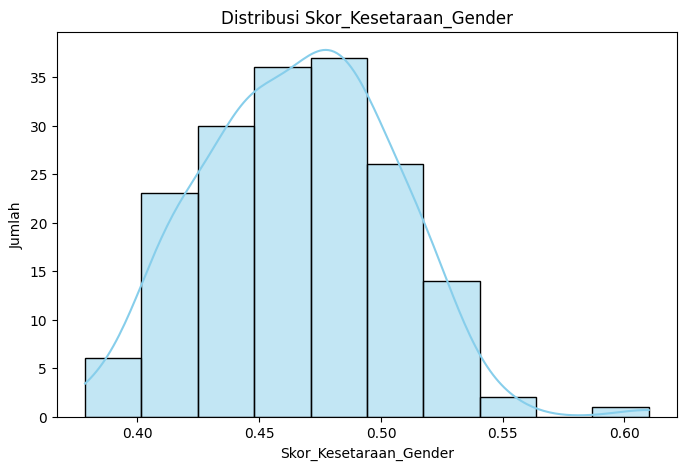

In [ ]:
# Plot Histogram untuk IPG
plt.figure(figsize=(8,5))
sns.histplot(df_cluster['Skor_Kesetaraan_Gender'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Skor_Kesetaraan_Gender')
plt.xlabel('Skor_Kesetaraan_Gender')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-33-3091219144>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_cluster, x='TPAK Perempuan', y='TPAK Laki-laki', palette='coolwarm', s=100)


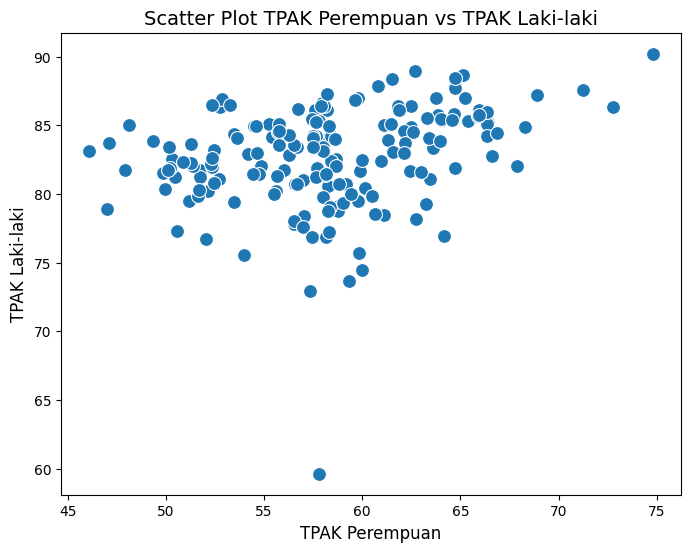

In [ ]:
# Membuat scatter plot TPAK Perempuan vs TPAK Laki-laki
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='TPAK Perempuan', y='TPAK Laki-laki', palette='coolwarm', s=100)

# Menambahkan label dan judul
plt.title('Scatter Plot TPAK Perempuan vs TPAK Laki-laki', fontsize=14)
plt.xlabel('TPAK Perempuan', fontsize=12)
plt.ylabel('TPAK Laki-laki', fontsize=12)

# Menampilkan plot
plt.show()

Scatter plot ini memperlihatkan bahwa semakin tinggi TPAK Perempuan di suatu daerah, biasanya TPAK Laki-lakinya juga tinggi. Namun, TPAK Laki-laki cenderung lebih tinggi secara keseluruhan dibanding TPAK Perempuan. Hubungan positif ini dapat menjadi indikasi bahwa faktor-faktor yang meningkatkan partisipasi kerja perempuan juga berdampak pada laki-laki

Berikut interpretasi dari scatter plot yang menampilkan hubungan antara TPAK Perempuan dan TPAK Laki-laki:

- **Hubungan Positif:** Titik-titik pada scatter plot cenderung membentuk pola naik dari kiri bawah ke kanan atas. Ini menunjukkan adanya hubungan positif antara TPAK Perempuan dan TPAK Laki-laki. Artinya, daerah dengan TPAK Perempuan yang tinggi cenderung juga memiliki TPAK Laki-laki yang tinggi, dan sebaliknya.

- **Rentang Nilai:** TPAK Perempuan pada sumbu X berkisar antara sekitar 45 hingga 75, sedangkan TPAK Laki-laki pada sumbu Y berkisar antara sekitar 59 hingga 91. Ini menunjukkan bahwa partisipasi angkatan kerja laki-laki umumnya lebih tinggi dibanding perempuan.

- **Penyebaran Data:** Sebagian besar data terkonsentrasi pada rentang TPAK Perempuan 50–65 dan TPAK Laki-laki 80–88. Ini mengindikasikan bahwa mayoritas daerah memiliki tingkat partisipasi angkatan kerja laki-laki yang tinggi dan perempuan yang sedang hingga tinggi.

- **Outlier:** Ada beberapa titik yang berada di luar pola utama, misalnya satu titik dengan TPAK Laki-laki di bawah 60, yang menandakan adanya daerah dengan partisipasi laki-laki yang jauh lebih rendah dari rata-rata.

**Kesimpulan:**  
Scatter plot ini memperlihatkan bahwa semakin tinggi TPAK Perempuan di suatu daerah, biasanya TPAK Laki-lakinya juga tinggi. Namun, TPAK Laki-laki cenderung lebih tinggi secara keseluruhan dibanding TPAK Perempuan. Hubungan positif ini dapat menjadi indikasi bahwa faktor-faktor yang meningkatkan partisipasi kerja perempuan juga berdampak pada laki-laki, atau sebaliknya.



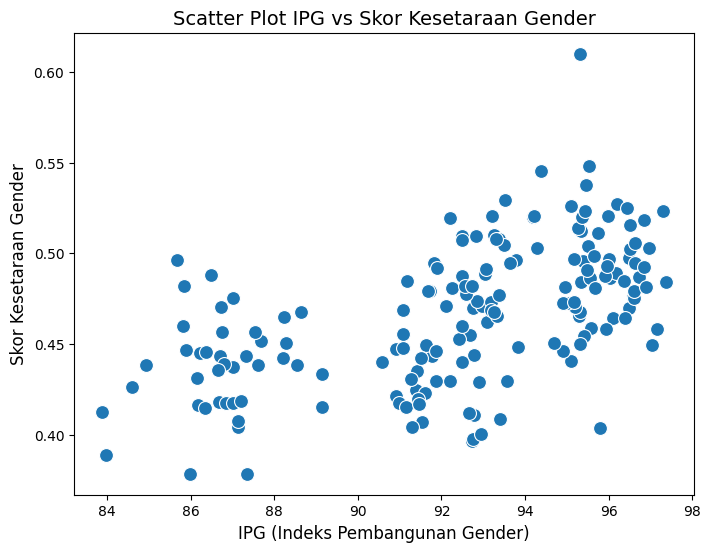

In [ ]:
# Membuat scatter plot IPG vs Skor Kesetaraan Gender tanpa hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='IPG', y='Skor_Kesetaraan_Gender', s=100)

# Menambahkan label dan judul
plt.title('Scatter Plot IPG vs Skor Kesetaraan Gender', fontsize=14)
plt.xlabel('IPG (Indeks Pembangunan Gender)', fontsize=12)
plt.ylabel('Skor Kesetaraan Gender', fontsize=12)

# Menampilkan plot
plt.show()

Untuk scatter plot IPG (Indeks Pembangunan Gender) vs. Skor Kesetaraan Gender yang Anda lampirkan:

1. **Pola Dua Kelompok:** Titik-titik data membentuk dua kelompok terpisah. Kelompok pertama berada pada rentang IPG sekitar 84-90, dan kelompok kedua berada pada rentang IPG sekitar 90-98. Ini menunjukkan ada perbedaan karakteristik antara wilayah-wilayah dengan IPG rendah dan tinggi.

2. **Korelasi Positif dalam Kelompok Tinggi:** Pada kelompok dengan IPG lebih tinggi (90-98), terlihat kecenderungan korelasi positif yang jelas. Artinya, semakin tinggi IPG, semakin tinggi pula skor kesetaraan gender.

3. **Variasi pada Kelompok Rendah:** Pada kelompok dengan IPG lebih rendah (84-90), variasi skor kesetaraan gender lebih besar. Ini menunjukkan bahwa wilayah dengan IPG rendah memiliki tingkat kesetaraan gender yang beragam, tidak selalu rendah.

**Kesimpulan:**

*   Scatter plot ini menunjukkan bahwa ada hubungan positif antara IPG dan Skor Kesetaraan Gender, terutama pada wilayah dengan IPG yang lebih tinggi.
*   Namun, hubungan ini tidak linier dan tidak berlaku secara universal. Ada faktor-faktor lain yang mempengaruhi kesetaraan gender di wilayah dengan IPG rendah.
*   Dibutuhkan analisis lebih lanjut untuk memahami mengapa ada dua kelompok yang terpisah dan apa saja faktor-faktor yang mempengaruhi variasi skor kesetaraan gender pada masing-masing kelompok.



1. Positif/Negatif: Hubungan positif. Semakin tinggi IPG, cenderung semakin tinggi skor kesetaraan gender.

2. Linier/Tidak Linier: Tidak linier. Hubungan lebih kuat pada kelompok IPG tinggi (90-98) dibandingkan kelompok IPG rendah (84-90).

3. Kuat/Tidak Kuat: Moderat (cukup kuat). Ada kecenderungan positif, tetapi sebaran data tidak terlalu rapat, terutama pada kelompok IPG rendah.

# **MODELING**

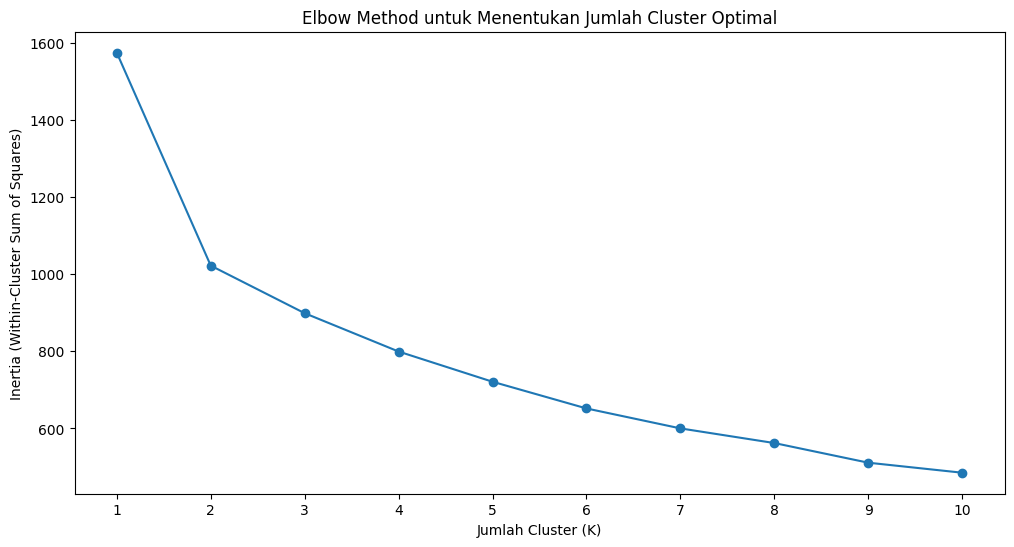

In [ ]:
from sklearn.cluster import KMeans


# Pilih Fitur
features = ['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki', 'Pendapatan Perempuan', 'Perempuan di Legislatif', 'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender']
X = df_final[features]

# Standardisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan Jumlah Cluster Optimal menggunakan Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(K)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Pilih Fitur
features = ['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki', 'Pendapatan Perempuan', 'Perempuan di Legislatif', 'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender']
X = df_final[features]

# Standardisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Silhouette Analysis untuk berbagai jumlah cluster
for n_clusters in range(2, 11):
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is : {silhouette_avg}")


For n_clusters = 2, the silhouette score is : 0.3034624794347124
For n_clusters = 3, the silhouette score is : 0.21395671814634357
For n_clusters = 4, the silhouette score is : 0.19374792878605857
For n_clusters = 5, the silhouette score is : 0.19858085898968933
For n_clusters = 6, the silhouette score is : 0.19994850181303456
For n_clusters = 7, the silhouette score is : 0.20342068974096297
For n_clusters = 8, the silhouette score is : 0.22100339253412812
For n_clusters = 9, the silhouette score is : 0.22019308991800804
For n_clusters = 10, the silhouette score is : 0.22527260863278384


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Pilih Fitur
features = ['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki', 'Pendapatan Perempuan',
            'Perempuan di Legislatif', 'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender']
X = df_final[features]

# Standardisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means dengan n_clusters = 2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Tambahkan Label Cluster ke DataFrame
df_final['Cluster'] = cluster_labels
# Tampilkan DataFrame dengan Label Cluster
df_final.head()

,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender,Kabupaten / Kota,Tahun,Cluster
0,-1.414214,-1.620361,-1.225113,-2.113267,0.273714,-1.225113,0.753577,-1.296357,-2.235967,-1.264094,3301 Kabupaten Cilacap,2019,0
1,-0.707107,-1.614673,-1.210769,-1.102040,0.141065,-1.210769,1.041941,-1.569307,-1.177077,-0.598001,3301 Kabupaten Cilacap,2020,0
2,0.000000,-1.526510,-1.148613,-2.134059,-1.050008,-1.148613,1.041941,-1.157487,-1.722169,-0.751695,3301 Kabupaten Cilacap,2021,0
3,0.707107,-1.520822,-1.204394,-1.597258,-0.320441,-1.204394,1.041941,1.208082,-1.478428,0.248624,3301 Kabupaten Cilacap,2022,0
4,1.414214,-1.429815,-1.213957,-1.922362,0.635734,-1.213957,-0.399878,-2.287598,-2.185662,-2.298042,3301 Kabupaten Cilacap,2023,0


In [ ]:
df_final.head(20)

,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender,Kabupaten / Kota,Tahun,Cluster
0,-1.414214,-1.620361,-1.225113,-2.113267,0.273714,-1.225113,0.753577,-1.296357,-2.235967,-1.264094,3301 Kabupaten Cilacap,2019,0
1,-0.707107,-1.614673,-1.210769,-1.102040,0.141065,-1.210769,1.041941,-1.569307,-1.177077,-0.598001,3301 Kabupaten Cilacap,2020,0
2,0.000000,-1.526510,-1.148613,-2.134059,-1.050008,-1.148613,1.041941,-1.157487,-1.722169,-0.751695,3301 Kabupaten Cilacap,2021,0
3,0.707107,-1.520822,-1.204394,-1.597258,-0.320441,-1.204394,1.041941,1.208082,-1.478428,0.248624,3301 Kabupaten Cilacap,2022,0
4,1.414214,-1.429815,-1.213957,-1.922362,0.635734,-1.213957,-0.399878,-2.287598,-2.185662,-2.298042,3301 Kabupaten Cilacap,2023,0
5,-1.414214,-1.185234,-0.509518,-1.325077,0.259896,-0.509518,0.465213,-0.269202,-1.449062,-0.624671,3302 Kabupaten Banyumas,2019,0
6,-0.707107,-1.165326,-0.504737,-1.236240,-0.254117,-0.504737,0.465213,-0.156669,-1.140389,-0.411315,3302 Kabupaten Banyumas,2020,0
7,0.000000,-1.088539,-0.536612,-1.574576,-0.643772,-0.536612,0.176849,-0.288356,-1.315546,-0.732129,3302 Kabupaten Banyumas,2021,0
8,0.707107,-0.915058,-0.420268,-1.960165,-0.254117,-0.420268,0.465213,-0.247653,-1.874617,-0.854257,3302 Kabupaten Banyumas,2022,0
9,1.414214,-0.917902,-0.372455,-2.306062,0.110667,-0.372455,-0.111514,0.128252,-2.365756,-1.340891,3302 Kabupaten Banyumas,2023,0


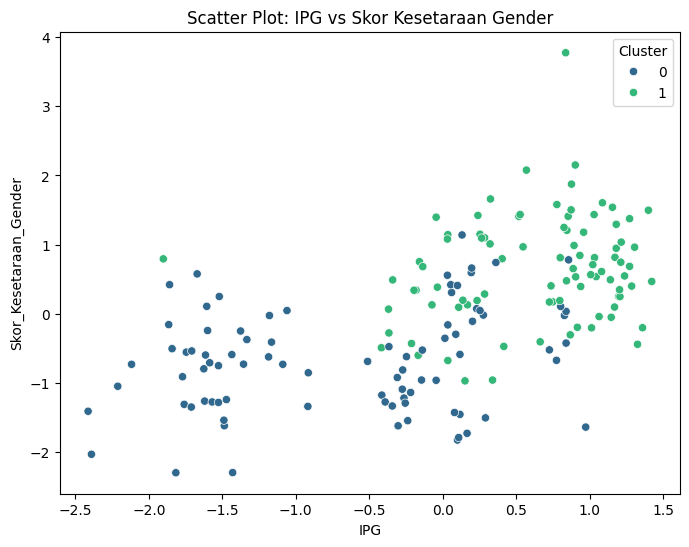

In [ ]:
# 1. Scatter Plot untuk Dua Fitur
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IPG', y='Skor_Kesetaraan_Gender', hue='Cluster', data=df_final, palette='viridis')
plt.title('Scatter Plot: IPG vs Skor Kesetaraan Gender')
plt.show()

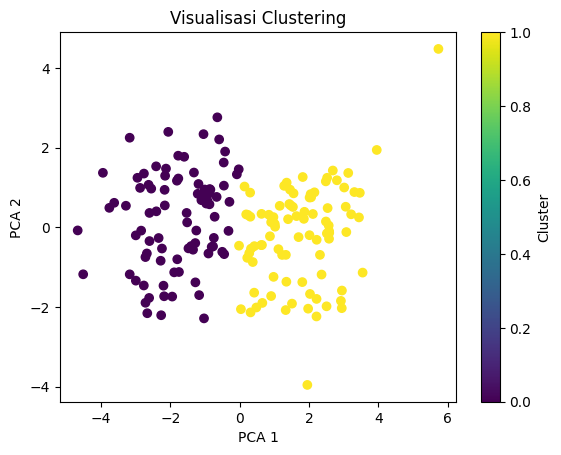

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster_labels = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Visualisasi Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
X.columns

Index(['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki',
       'Pendapatan Perempuan', 'Perempuan di Legislatif',
       'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender'],
      dtype='object')

In [ ]:
loading_matrix = pd.DataFrame(pca.components_,
                              columns=['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki',
                                       'Pendapatan Perempuan', 'Perempuan di Legislatif',
                                       'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender'],
                              index=['PCA 1', 'PCA 2'])

print(loading_matrix.T)

                                 PCA 1     PCA 2
IPG                           0.359584  0.015410
IDG                           0.394525 -0.091697
TPAK Perempuan                0.340194 -0.492076
TPAK Laki-laki               -0.137245 -0.497606
Pendapatan Perempuan          0.394525 -0.091697
Perempuan di Legislatif       0.156234  0.554528
Perempuan Tenaga Profesional  0.235655  0.222703
Rasio_TPAK                    0.416963 -0.225392
Skor_Kesetaraan_Gender        0.413560  0.292055


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Pilih Fitur
features = ['IPG', 'IDG', 'TPAK Perempuan', 'TPAK Laki-laki', 'Pendapatan Perempuan', 'Perempuan di Legislatif', 'Perempuan Tenaga Profesional', 'Rasio_TPAK', 'Skor_Kesetaraan_Gender']
X = df_final[features]

# Jumlah Cluster
n_clusters = 2

# Jumlah Random State yang akan diuji
n_runs = 10

# List untuk menyimpan ARI
ari_scores = []

# Loop untuk menjalankan K-Means dengan random state yang berbeda
for i in range(n_runs):
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=i)  # Ganti random_state setiap iterasi
    cluster_labels = kmeans.fit_predict(X)

    # Hitung ARI dengan iterasi sebelumnya (jika ada)
    if i > 0:
        ari = adjusted_rand_score(cluster_labels, previous_labels)
        ari_scores.append(ari)

    # Simpan label cluster untuk iterasi selanjutnya
    previous_labels = cluster_labels

# Hitung Rata-rata ARI
avg_ari = np.mean(ari_scores)

# Kesimpulan
print(f"Average ARI over {n_runs} runs: {avg_ari}")

if avg_ari > 0.8:
    print("Clustering is relatively stable.")
else:
    print("Clustering may not be stable.")


Average ARI over 10 runs: 1.0
Clustering is relatively stable.


# **PROFILING**

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


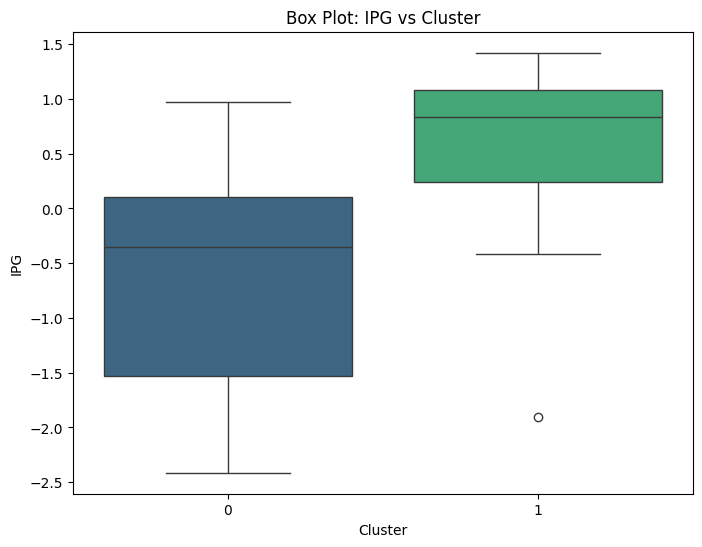

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


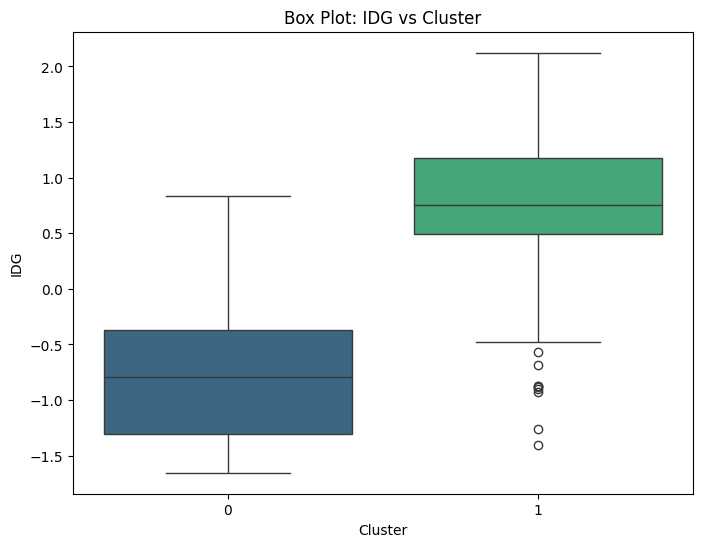

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


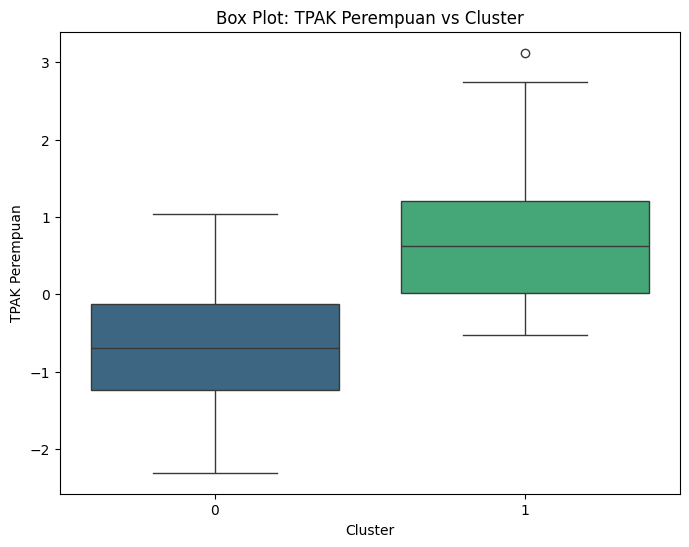

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


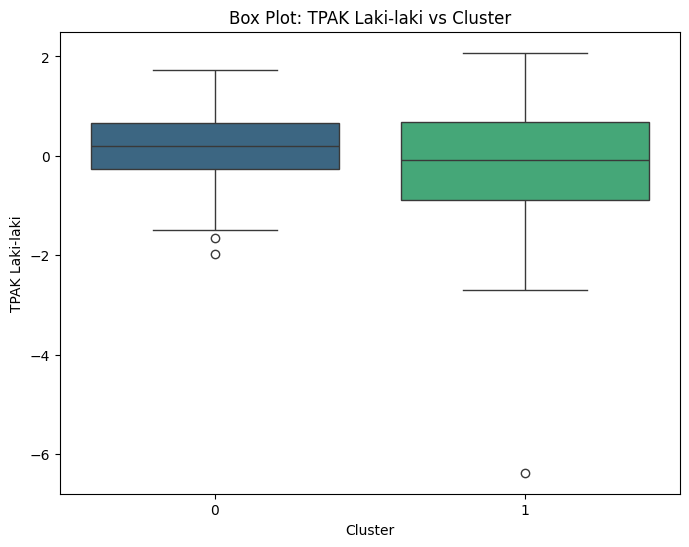

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


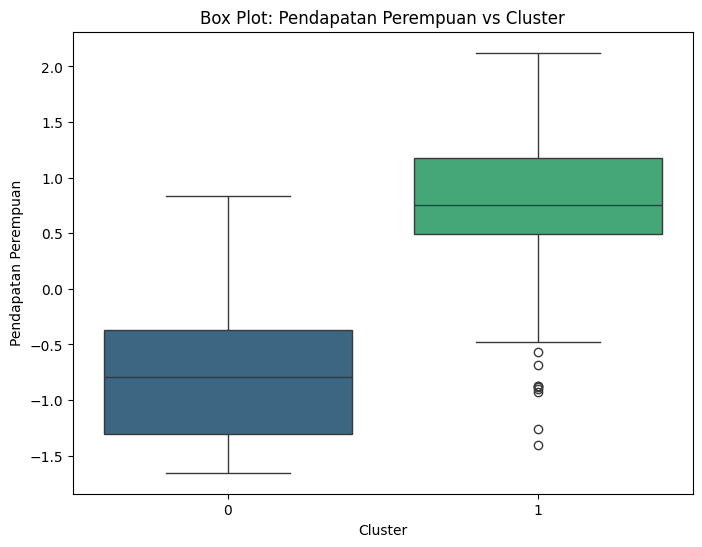

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


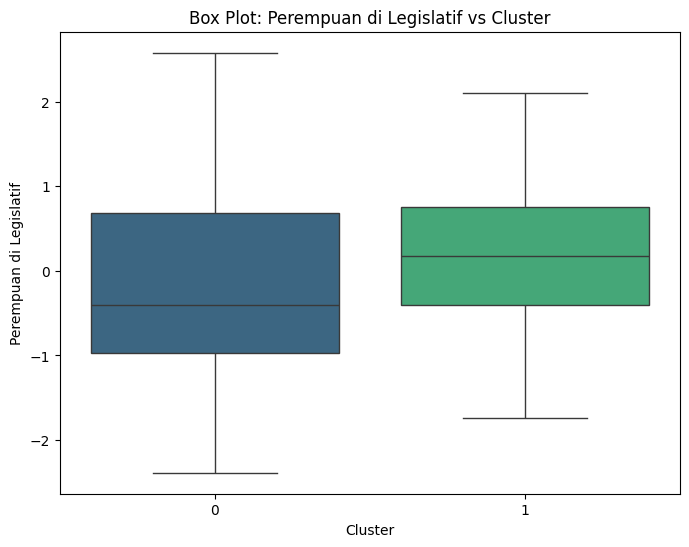

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


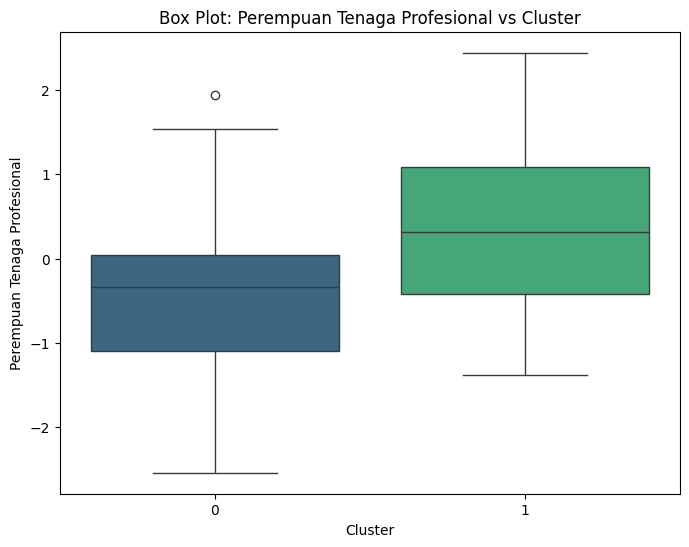

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


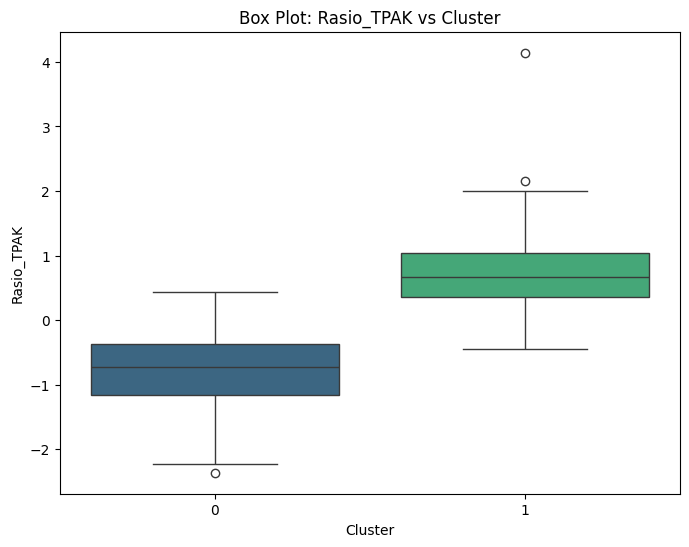

<ipython-input-44-3083016069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')


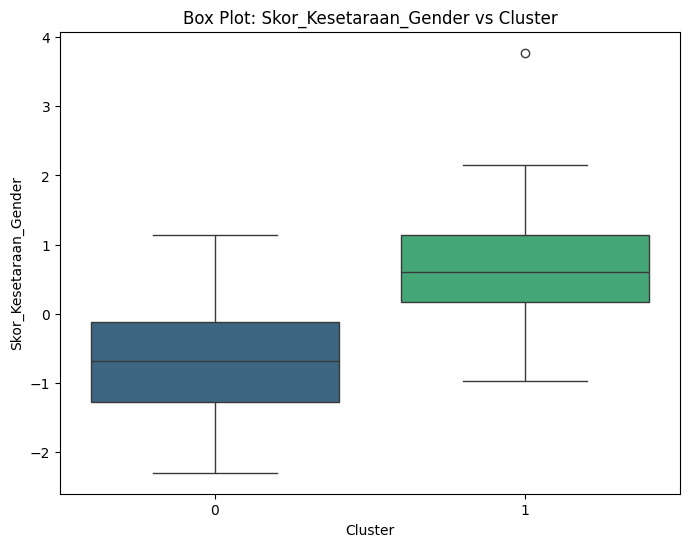

In [ ]:
# Box Plot untuk Setiap Fitur
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_final, palette='viridis')
    plt.title(f'Box Plot: {feature} vs Cluster')
    plt.show()

In [ ]:
# Import library tambahan
import pandas as pd

# Buat deskripsi statistik per cluster
desc_per_cluster = df_final.groupby('Cluster')[features].describe()

# Tampilkan deskripsi ringkas mean/median per fitur di setiap cluster
print("Statistik per Cluster (Mean):")
print(df_final.groupby('Cluster')[features].mean())

print("\nStatistik per Cluster (Median):")
print(df_final.groupby('Cluster')[features].median())

# Menampilkan daerah mana saja di tiap cluster

print("\nDaftar Daerah per Cluster:")
for cluster_label in sorted(df_final['Cluster'].unique()):
    print(f"\nCluster {cluster_label}:")
    daerah_cluster = df_final[df_final['Cluster'] == cluster_label]['Kabupaten / Kota'].tolist()
    for daerah in daerah_cluster:
        print(f"- {daerah}")

Statistik per Cluster (Mean):
              IPG       IDG  TPAK Perempuan  TPAK Laki-laki  \
Cluster                                                       
0       -0.656455 -0.733329       -0.694868        0.188688   
1        0.634328  0.708610        0.671446       -0.182328   

         Pendapatan Perempuan  Perempuan di Legislatif  \
Cluster                                                  
0                   -0.733329                -0.139110   
1                    0.708610                 0.134421   

         Perempuan Tenaga Profesional  Rasio_TPAK  Skor_Kesetaraan_Gender  
Cluster                                                                    
0                           -0.381984   -0.794754               -0.667442  
1                            0.369108    0.767964                0.644944  

Statistik per Cluster (Median):
              IPG       IDG  TPAK Perempuan  TPAK Laki-laki  \
Cluster                                                       
0       -0.354797 -0.

Distribusi Cluster dalam Persentase:
Cluster
0    49.142857
1    50.857143
Name: count, dtype: float64


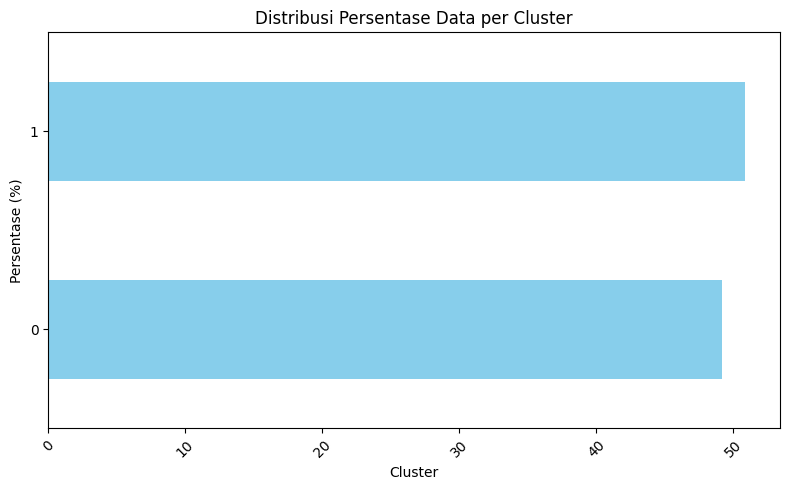

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data per cluster
cluster_counts = df_final['Cluster'].value_counts().sort_index()

# Hitung persentase tiap cluster
cluster_percent = cluster_counts / cluster_counts.sum() * 100

# Tampilkan persentase dalam bentuk tabel
print("Distribusi Cluster dalam Persentase:")
print(cluster_percent)

# Plot bar chart dengan label miring
plt.figure(figsize=(8,5))
cluster_percent.plot(kind='barh', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Persentase (%)')
plt.title('Distribusi Persentase Data per Cluster')
plt.xticks(rotation=45)  # Label sumbu x miring 45 derajat
plt.tight_layout()
plt.show()

In [ ]:
# Daerah yang masuk Cluster 0
print("Daerah di Cluster 0:")
df_final[df_final['Cluster'] == 0]

Daerah di Cluster 0:


,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender,Kabupaten / Kota,Tahun,Cluster
0,-1.414214,-1.620361,-1.225113,-2.113267,0.273714,-1.225113,0.753577,-1.296357,-2.235967,-1.264094,3301 Kabupaten Cilacap,2019,0
1,-0.707107,-1.614673,-1.210769,-1.102040,0.141065,-1.210769,1.041941,-1.569307,-1.177077,-0.598001,3301 Kabupaten Cilacap,2020,0
2,0.000000,-1.526510,-1.148613,-2.134059,-1.050008,-1.148613,1.041941,-1.157487,-1.722169,-0.751695,3301 Kabupaten Cilacap,2021,0
3,0.707107,-1.520822,-1.204394,-1.597258,-0.320441,-1.204394,1.041941,1.208082,-1.478428,0.248624,3301 Kabupaten Cilacap,2022,0
4,1.414214,-1.429815,-1.213957,-1.922362,0.635734,-1.213957,-0.399878,-2.287598,-2.185662,-2.298042,3301 Kabupaten Cilacap,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.707107,0.839668,-0.955769,-0.153188,0.196336,-0.955769,-1.058789,0.987807,-0.257221,-0.425023,3375 Kota Pekalongan,2022,0
171,-0.707107,0.231060,-0.544581,-0.814738,-1.978548,-0.544581,-0.784844,1.284700,0.141770,0.072304,3376 Kota Tegal,2020,0
172,0.000000,0.253812,-0.613112,-0.500974,-0.384002,-0.613112,-0.784844,1.935950,-0.333014,0.045323,3376 Kota Tegal,2021,0
173,0.707107,0.290783,-0.665706,-0.880893,0.387018,-0.665706,-0.784844,-1.195796,-1.063548,-1.506565,3376 Kota Tegal,2022,0


In [ ]:
# Daerah yang masuk Cluster 1
print("\nDaerah di Cluster 1:")
df_final[df_final['Cluster'] == 1]


Daerah di Cluster 1:


,Tahun,IPG,IDG,TPAK Perempuan,TPAK Laki-laki,Pendapatan Perempuan,Perempuan di Legislatif,Perempuan Tenaga Profesional,Rasio_TPAK,Skor_Kesetaraan_Gender,Kabupaten / Kota,Tahun,Cluster
13,0.707107,0.239592,-0.681643,0.797554,0.594281,-0.681643,0.496933,2.319038,0.488842,1.421592,3303 Kabupaten Purbalingga,2022,1
14,1.414214,0.324911,-0.476049,0.729509,0.519667,-0.476049,1.778710,0.887246,0.458977,1.659497,3303 Kabupaten Purbalingga,2023,1
23,0.707107,0.253812,-1.408395,0.506472,-0.077252,-1.408395,0.465213,1.552862,0.536382,1.148935,3305 Kabupaten Kebumen,2022,1
24,1.414214,0.285095,-1.264957,0.795664,1.014335,-1.264957,0.753577,1.320615,0.283797,1.098098,3305 Kabupaten Kebumen,2023,1
26,-0.707107,0.737285,-0.001111,0.351480,-0.635481,-0.001111,-0.143234,0.319797,0.667817,0.402580,3306 Kabupaten Purworejo,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-1.414214,0.725910,-0.877675,0.729509,0.069214,-0.877675,-1.058789,1.174562,0.685314,0.169146,3375 Kota Pekalongan,2019,1
166,-0.707107,0.797009,-0.882456,0.200269,-2.495325,-0.882456,-1.435104,0.506552,1.568871,0.189774,3375 Kota Pekalongan,2020,1
167,0.000000,0.868108,-0.928675,1.445873,0.845761,-0.928675,-1.471150,0.089944,0.993337,-0.305461,3375 Kota Pekalongan,2021,1
169,1.414214,0.933519,-0.872894,1.073515,0.309640,-0.872894,0.176849,0.633450,0.903824,0.843079,3375 Kota Pekalongan,2023,1


In [ ]:
df_final.to_excel('hasil_clustering.xlsx')